In [20]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DBNAME}')



In [2]:
query_churn_status = """
    SELECT * 
    FROM churn_status;
"""
churn_status_df = pd.read_sql(query_churn_status, database_conn)


query_account = """
    SELECT * 
    FROM account;
"""
account_df = pd.read_sql(query_account, database_conn)


query_account_usage = """
    SELECT * 
    FROM account_usage;
"""
account_usage_df = pd.read_sql(query_account_usage, database_conn)


query_customer = """
    SELECT * 
    FROM customer;
"""
customer_df = pd.read_sql(query_customer, database_conn)


query_city = """
    SELECT * 
    FROM city;
"""
city_df = pd.read_sql(query_city, database_conn)

In [28]:
# Join tables

query_full = """
    SELECT A.churn_category,
            A.churn_reason,
            D.age,
            D.senior_citizen
    FROM churn_status AS A
    LEFT JOIN account AS B
    ON A.customer_id = B.customer_id
    LEFT JOIN account_usage AS C
    ON B.account_id = C.account_id
    LEFT JOIN customer AS D
    ON A.customer_id = D.customer_id
"""

full_df = pd.read_sql(query_full, database_conn)
# full_df.info()

smaller_df = full_df[full_df["senior_citizen"] == "Yes"]
smaller_df["age"].min()

65

c:\Users\ShengDa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


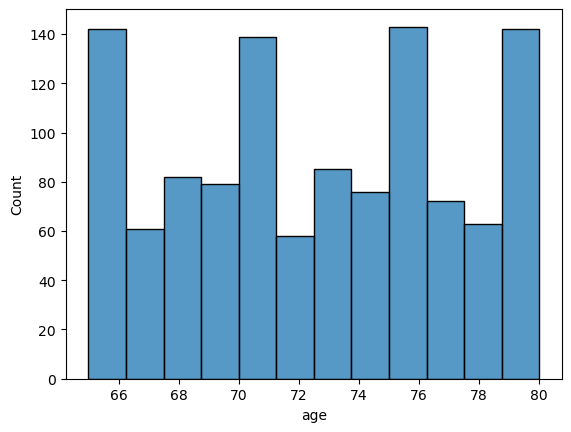

In [25]:
sns.histplot(smaller_df["age"])
plt.show()